# Ebola Data Loader

In this notebook, we'll format data from [The World Health Organization](http://apps.who.int/gho/data/view.ebola-sitrep.ebola-country-SLE-20150422-graph?lang=en) for future analysis

In [1]:
%pylab inline
import pandas as pd
import re

Populating the interactive namespace from numpy and matplotlib


In [2]:
#read in the raw data
rawdata = pd.read_csv('Ebola_in_SL_Raw_WHO_Data.csv')
rawdata.iloc[1]

COUNTRY (CODE)                                     SLE
COUNTRY (DISPLAY)                         Sierra Leone
COUNTRY (URL)                                      NaN
EBOLA_MEASURE (CODE)                             CASES
EBOLA_MEASURE (DISPLAY)                Number of cases
EBOLA_MEASURE (URL)                                NaN
CASE_DEFINITION (CODE)                       CONFIRMED
CASE_DEFINITION (DISPLAY)                    Confirmed
CASE_DEFINITION (URL)                              NaN
EBOLA_DATA_SOURCE (CODE)                     PATIENTDB
EBOLA_DATA_SOURCE (DISPLAY)           Patient database
EBOLA_DATA_SOURCE (URL)                            NaN
EPI_WEEK (CODE)                               2015-W07
EPI_WEEK (DISPLAY)              09 to 15 February 2015
EPI_WEEK (URL)                                     NaN
INDICATOR_TYPE (CODE)                       SITREP_NEW
INDICATOR_TYPE (DISPLAY)                           New
INDICATOR_TYPE (URL)                               NaN
DATAPACKAG

In [3]:
#parse the dates column
import dateutil

def parsedate(week_string):
    end_date_str = re.split(' to ', week_string)[1]
    return(dateutil.parser.parse(end_date_str))

rawdata['End Date'] = rawdata['EPI_WEEK (DISPLAY)'].apply(parsedate)
rawdata.head()

,COUNTRY (CODE),COUNTRY (DISPLAY),COUNTRY (URL),EBOLA_MEASURE (CODE),EBOLA_MEASURE (DISPLAY),EBOLA_MEASURE (URL),CASE_DEFINITION (CODE),CASE_DEFINITION (DISPLAY),CASE_DEFINITION (URL),EBOLA_DATA_SOURCE (CODE),...,INDICATOR_TYPE (URL),DATAPACKAGEID (CODE),DATAPACKAGEID (DISPLAY),DATAPACKAGEID (URL),Display Value,Numeric,Low,High,Comments,End Date
0,SLE,Sierra Leone,NaN,CASES,Number of cases,NaN,CONFIRMED,Confirmed,NaN,SITREP,...,NaN,2015-04-22,Data package 2015-04-22,NaN,NaN,NaN,NaN,NaN,NaN,2014-02-23
1,SLE,Sierra Leone,NaN,CASES,Number of cases,NaN,CONFIRMED,Confirmed,NaN,PATIENTDB,...,NaN,2015-04-22,Data package 2015-04-22,NaN,92.0,92.0,NaN,NaN,NaN,2015-02-15
2,SLE,Sierra Leone,NaN,CASES,Number of cases,NaN,CONFIRMED,Confirmed,NaN,PATIENTDB,...,NaN,2015-04-22,Data package 2015-04-22,NaN,455.0,455.0,NaN,NaN,NaN,2014-10-19
3,SLE,Sierra Leone,NaN,CASES,Number of cases,NaN,CONFIRMED,Confirmed,NaN,SITREP,...,NaN,2015-04-22,Data package 2015-04-22,NaN,63.0,63.0,NaN,NaN,NaN,2015-02-22
4,SLE,Sierra Leone,NaN,CASES,Number of cases,NaN,CONFIRMED,Confirmed,NaN,SITREP,...,NaN,2015-04-22,Data package 2015-04-22,NaN,80.0,80.0,NaN,NaN,NaN,2015-02-01


In [4]:
data = rawdata[rawdata['EBOLA_DATA_SOURCE (CODE)']=='PATIENTDB']
data = data[['End Date','Numeric']]
data.sort_values('End Date', inplace=True)
data.dropna(inplace=True)
data['Timedelta'] = data['End Date']-data['End Date'].iloc[0]
data['Weeks'] = data['Timedelta'].apply(lambda a: pd.Timedelta(a).days/7)
data.set_index('Weeks', inplace=True)
data = data[['Numeric']]
data.columns=['New Reported Cases']
data['Cumulative Cases'] = data['New Reported Cases'].cumsum()

<AxesSubplot:xlabel='Weeks'>

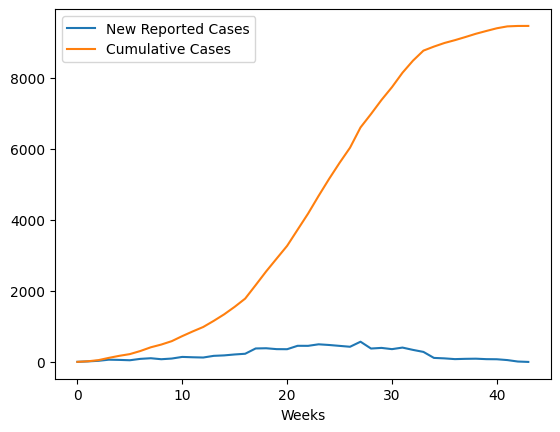

In [5]:
data.plot()

In [6]:
data.to_csv('Ebola_in_SL_Data.csv')